In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing dataset
dt=pd.read_csv("iris_csv.csv")
dt.head(10)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [13]:
#cleaning the data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
#Checking for NAN
dt.isnull().sum()
#no NAN present

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [6]:
#no of rows
len(dt['class'])

150

In [7]:
#no of columns
sum([1 for col in dt.columns])
    

5

In [8]:
#list of columns
[col for col in dt.columns]


['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class']

In [9]:
#group by type of species
dt.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<AxesSubplot:xlabel='class', ylabel='petalwidth'>

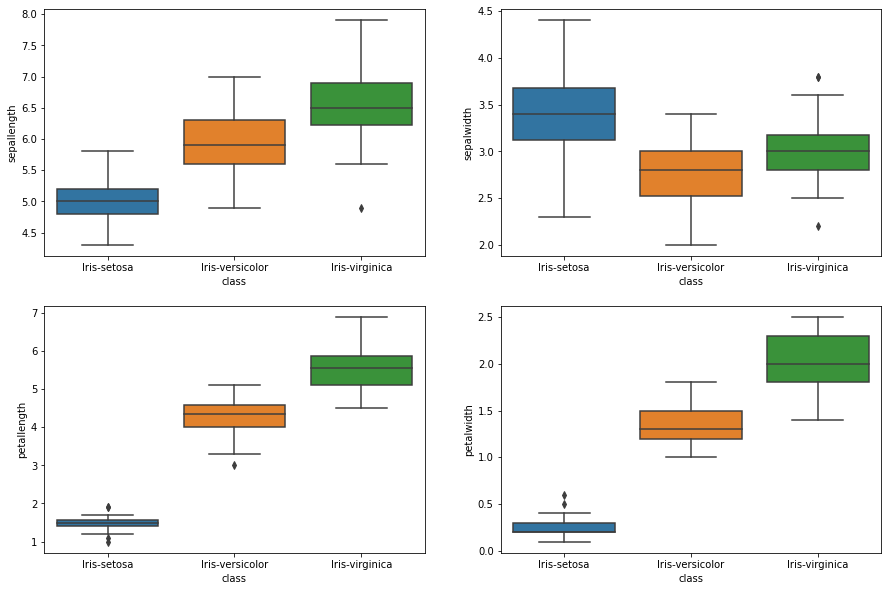

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='class',y='sepallength',data=dt)
plt.subplot(2,2,2)
sns.boxplot(x='class',y='sepalwidth',data=dt)
plt.subplot(2,2,3)
sns.boxplot(x='class',y='petallength',data=dt)
plt.subplot(2,2,4)
sns.boxplot(x='class',y='petalwidth',data=dt)

In [16]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
array = dt.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [18]:
#applying algorithm and evaluation
#Using Support vector classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(max_iter = 1000, gamma = 'auto')
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc= round(accuracy_score(Y_pred, Y_test),2)*100
print("accuracy:", acc_svc)


accuracy: 98.0


In [20]:
#using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
decisiontree =DecisionTreeClassifier(random_state=0)
decisiontree.fit(X_train,Y_train)
Y_pred = decisiontree.predict(X_test)
acc_decisiontree= round(accuracy_score(Y_pred, Y_test),2)*100
print("accuracy:", acc_decisiontree)

accuracy: 98.0


In [21]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_logreg2 = accuracy_score(Y_pred, Y_test)*100
print("Accuracy:", acc_logreg2)

Accuracy: 97.77777777777777
